# Robbins_Pymaceuticals Inc.
---

### Analysis

- When identifying the mice(249), there was a duplicated mice which was removed which left a total of 248 mice.
- The total count of female and male mice is 124 female to 125 male.
- The correlation between mouse weight and the average tumor volume is (0.8419363424694721, 2).
- Capomulin is the number 1 treatment per the analysis, and Ramicane comes in 2nd.
- The regression explains how much the average tumor volume will change when weight of mice change.


In [99]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

#Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [100]:
#Number of mice.
num_mice = combined_df["Mouse ID"].nunique()
print(num_mice)

249


In [101]:
#Our data should be uniquely identified by Mouse ID and Timepoint
#Get the duplicate mice by ID number (Mouse ID and Timepoint) 
duplicate_mouse_ids = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [102]:
#Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = combined_df.loc[combined_df["Mouse ID"]== "g989"]
print(duplicate_mouse_ids)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [103]:
#Create a clean df by dropping the duplicate mouse 
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mouse_ids) ==False]
clean_df.head(2)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [104]:
#Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].unique()
print(clean_mice)

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

## Summary Statistics
#Generate a summary statistics table of mean, median, variance, std, and SEM of the tumor volume for each regimen.

In [105]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume. 
#Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
#Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [106]:
#A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen (only one method is required in the solution)

#Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}) 
print(summary_table)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [107]:
#Pull total number of rows (Mouse ID/Timepoints) for each drug regimen 
counts = clean_df["Drug Regimen"].value_counts()
counts.head()

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: count, dtype: int64

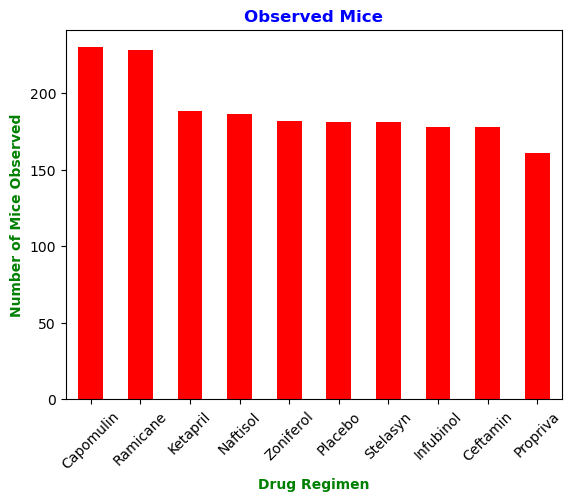

In [108]:
#Create a Bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pandas.
counts.plot(kind="bar", color= 'r')

#Set labels(x,y,title)
plt.xlabel("Drug Regimen", color='g', fontweight='bold')
plt.ylabel("Number of Mice Observed", color='g', fontweight='bold')
plt.xticks(rotation=45)
plt.title("Observed Mice", color= 'b', fontweight='bold')
plt.show()

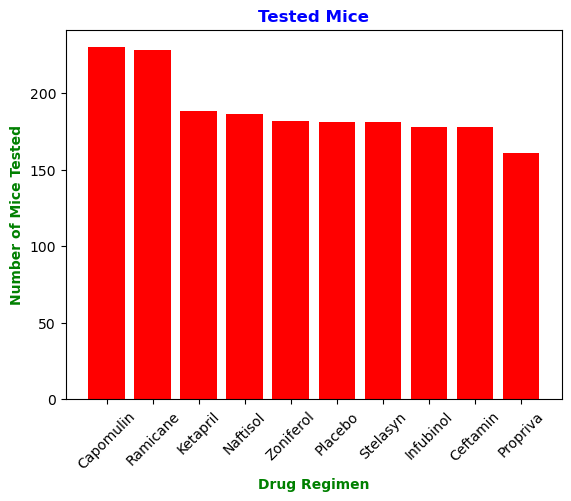

In [109]:
#Create a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
counts.plot = clean_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values, color= 'r')

#Set labels(x,y,title)
plt.xlabel("Drug Regimen", color='g', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Number of Mice Tested", color='g', fontweight='bold')
plt.title("Tested Mice", color= 'b', fontweight='bold')
plt.show()

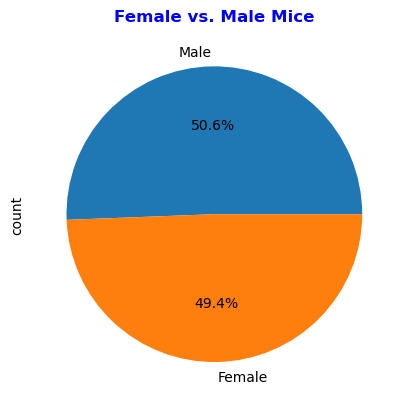

In [110]:
#Create a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice", fontweight='bold', color='b')
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

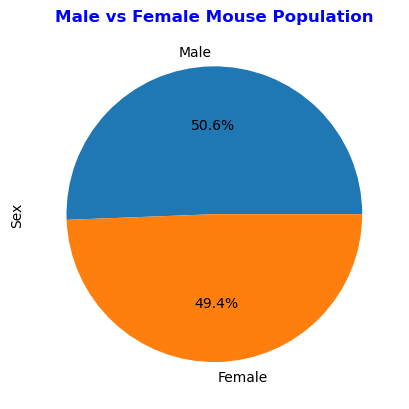

In [111]:
#Create a pie plot showing the distribution of female versus male mice using pyplot
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population', fontweight='bold', color='b')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots
#Put treatments into a list (and later for plot labels)
#Create empty list to fill with tumor vol data (for plotting)
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#Locate the rows which contain mice on each drug and get the tumor volumes add subset
#Determine outliers using upper and lower bounds


In [112]:
#Put treatments into a list for for loop (and later for plot labels)
#Create empty list to fill with tumor vol data (for plotting)
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#Locate the rows which contain mice on each drug and get the tumor volumes
#Determine outliers using upper and lower bounds

In [113]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]


In [114]:
#Get the last (greatest) timepoint for each mouse(Capolumin)
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0


In [115]:
#Retrive Quartiles(upper, lower and inner) "Capomulin"
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [116]:
#Get the last (greatest) timepoint for each mouse(Ramicane)
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [117]:
#Get the last (greatest) timepoint for each mouse (Infubinol)
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [118]:
#Get the last (greatest) timepoint for each mouse (Ceftamin)
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1470e65f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1470e6b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1470e6350>,
 'medians': [<matplotlib.lines.Line2D at 0x1470e7070>,
 'fliers': [<matplotlib.lines.Line2D at 0x1470e7310>,
 'means': []}

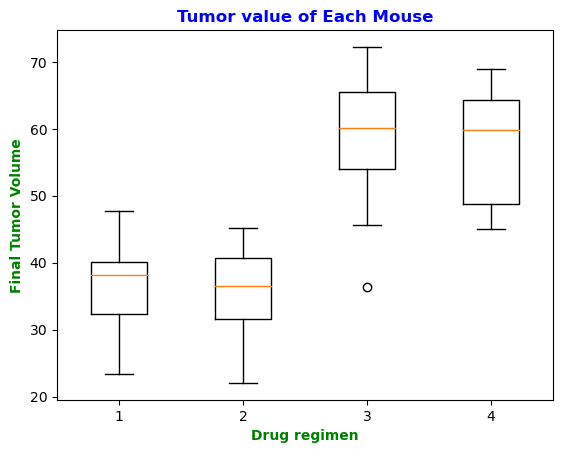

In [119]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

plt.title('Tumor value of Each Mouse',  color= 'b', fontweight='bold')
plt.xlabel('Drug regimen', color='g', fontweight='bold')
plt.ylabel('Final Tumor Volume', color='g', fontweight='bold')
plt.boxplot(boxplot_list)


## Line and Scatter Plots

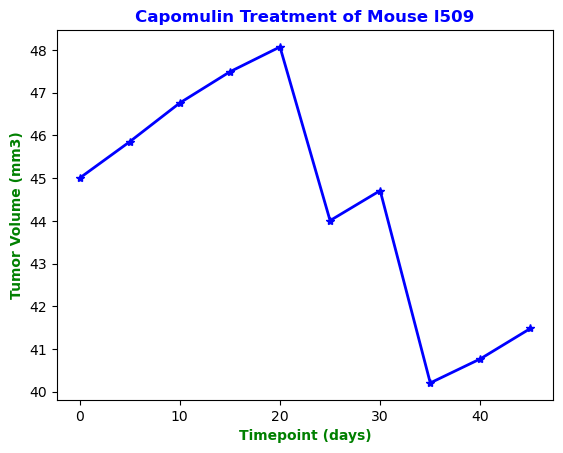

In [130]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = Capomulin_df.loc[Capomulin_df["Drug Regimen"] == "Capomulin"]
mouseinfo = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509"]

plt.plot(mouseinfo['Timepoint'],mouseinfo['Tumor Volume (mm3)'], linewidth=2, marker="*", color='b')
plt.xlabel('Timepoint (days)', color= 'g', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', color= 'g', fontweight='bold')
plt.title('Capomulin Treatment of Mouse l509', color= 'b', fontweight='bold')
plt.show()


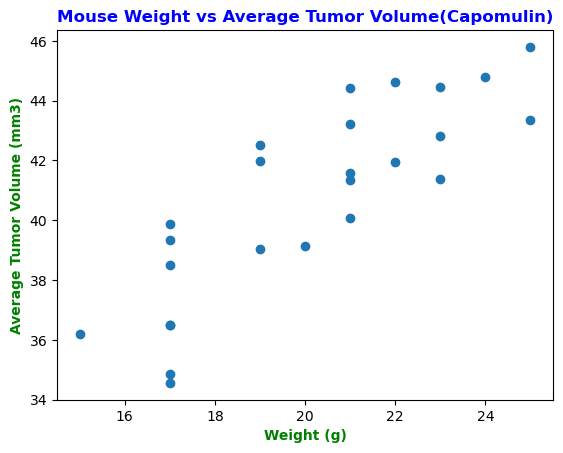

In [132]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = Capomulin_df.loc[Capomulin_df["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)', color= 'g', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', color= 'g', fontweight='bold')
plt.title ('Mouse Weight vs Average Tumor Volume(Capomulin)',color= 'b', fontweight='bold' )
plt.show()

## Correlation and Regression

In [135]:
#Calculate the correlation coefficient and a linear regression model 
#for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

The correlation between mouse weight and the average tumor volume is (0.8419363424694721, 2)


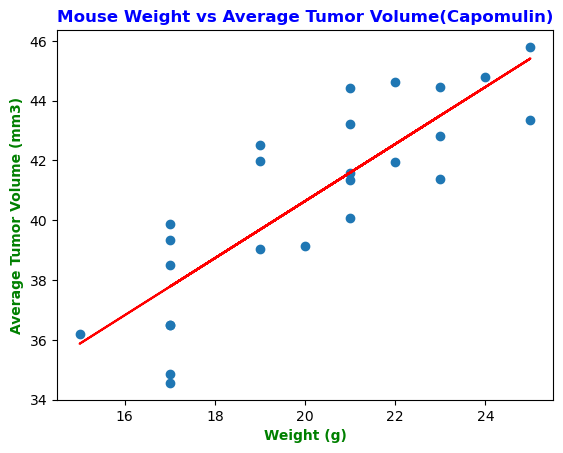

In [141]:
#Run a line regression
regress = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*regress[0]+regress[1]

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)', color= 'g', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', color= 'g', fontweight='bold')


plt.title ('Mouse Weight vs Average Tumor Volume(Capomulin)',color= 'b', fontweight='bold' )
plt.show()